In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
file_path = 'wine_quality_1000.csv'  # Adjust file path if necessary
data = pd.read_csv(file_path, index_col = 0)

In [14]:
print(data.head())

      country                                        description  points  \
87131      US  Very good Dry Creek Zin, robust and dry and sp...      89   
57952  France  A very herbaceous character makes this wine se...      84   
96046      US  A little simple and easy, but there's a wealth...      84   
31920      US  From a dry-farmed vineyard and treated to wild...      88   
6091       US  From a site near Annapolis, this wine shows a ...      91   

       price                     variety  
87131   25.0                   Zinfandel  
57952   20.0  Bordeaux-style White Blend  
96046   19.0                        Rosé  
31920   38.0                Petite Sirah  
6091    62.0                  Pinot Noir  


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 87131 to 31482
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      1000 non-null   object 
 1   description  1000 non-null   object 
 2   points       1000 non-null   int64  
 3   price        1000 non-null   float64
 4   variety      1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 46.9+ KB
None


In [12]:
print(data.describe())

            points        price
count  1000.000000  1000.000000
mean     87.806000    33.364000
std       3.369825    28.634235
min      80.000000     6.000000
25%      85.000000    18.000000
50%      88.000000    25.000000
75%      90.000000    40.000000
max      98.000000   463.000000


In [11]:
variety_counts = data['variety'].value_counts()
print(variety_counts)

variety
Pinot Noir                   111
Cabernet Sauvignon           107
Chardonnay                   105
Red Blend                     76
Syrah                         47
                            ... 
Tinta de Toro                  1
Garnacha Blanca                1
Colombard-Sauvignon Blanc      1
Pedro Ximénez                  1
Petit Verdot                   1
Name: count, Length: 105, dtype: int64


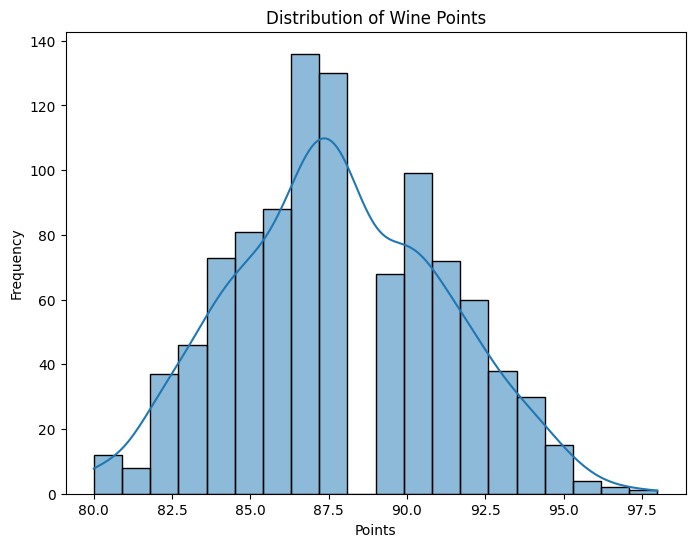

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data['points'], bins=20, kde=True)
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

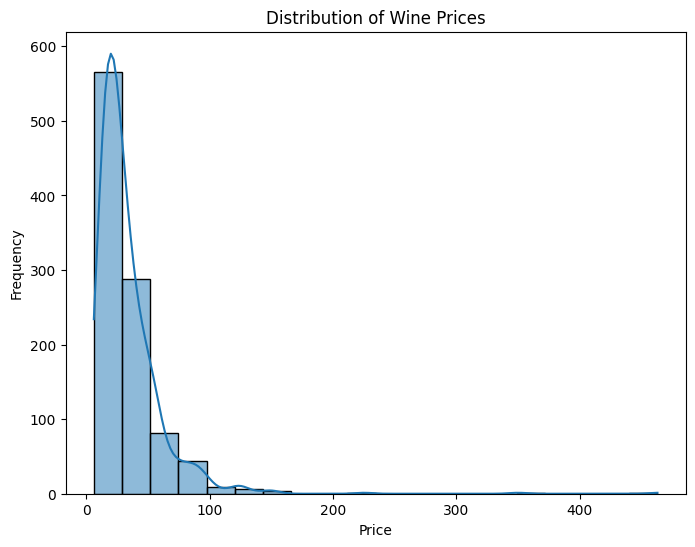

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

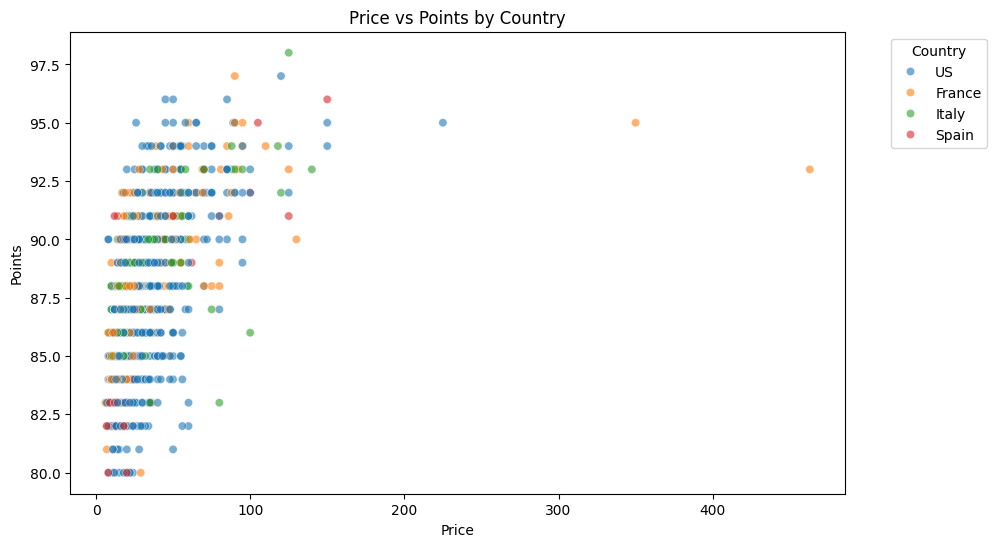

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='price', y='points', hue='country', alpha=0.6)
plt.title('Price vs Points by Country')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

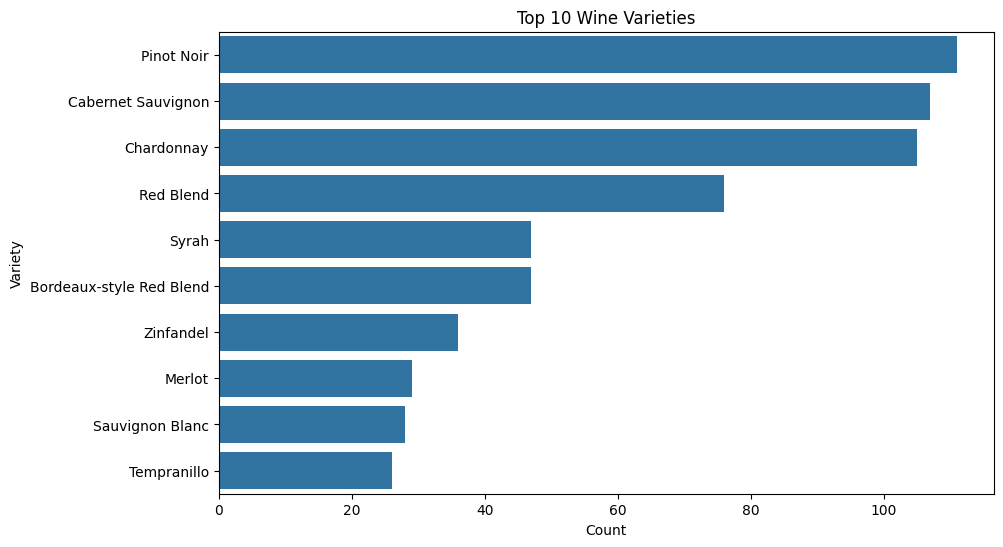

In [19]:
top_varieties = data['variety'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_varieties.values, y=top_varieties.index)
plt.title('Top 10 Wine Varieties')
plt.xlabel('Count')
plt.ylabel('Variety')
plt.show()

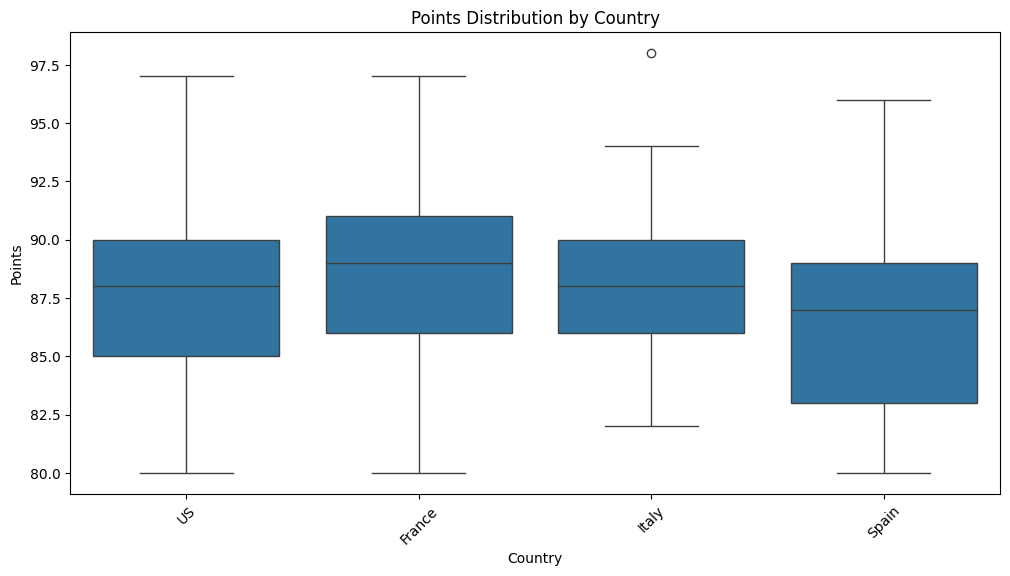

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='country', y='points')
plt.title('Points Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

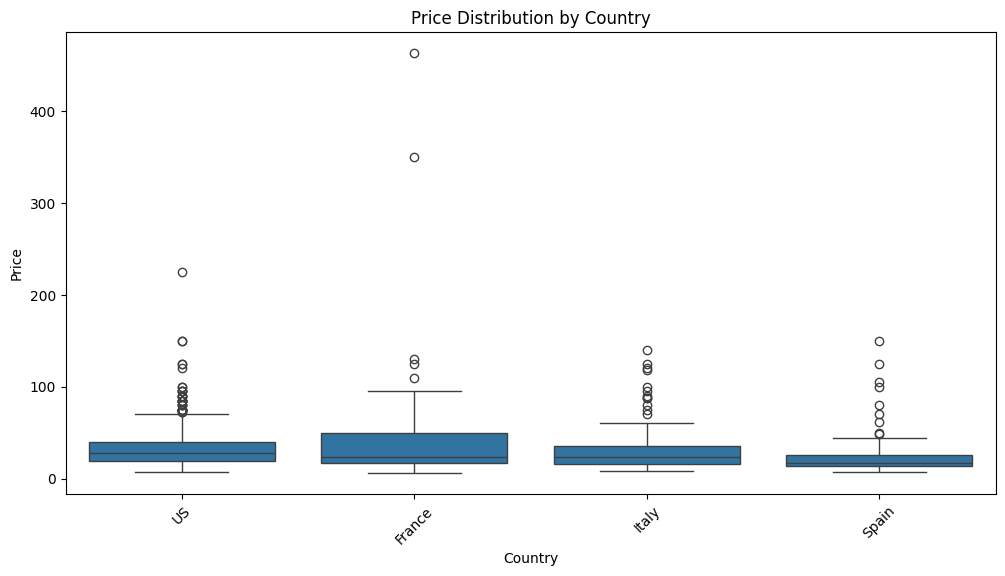

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='country', y='price')
plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

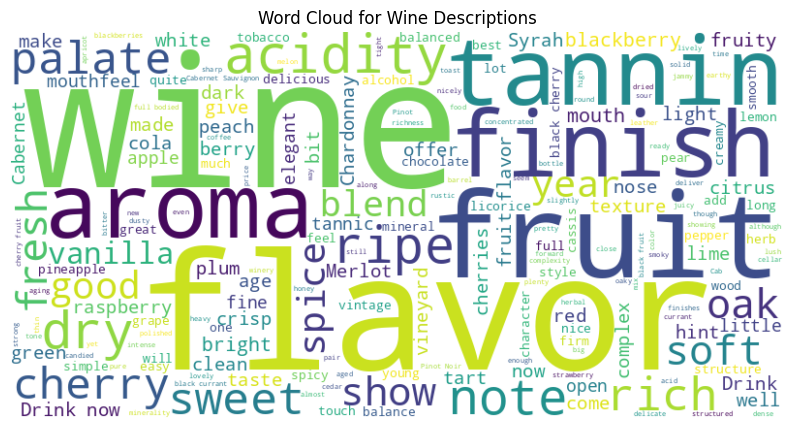

In [22]:
from wordcloud import WordCloud

text = " ".join(description for description in data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Wine Descriptions')
plt.show()

In [27]:
import nltk
from collections import Counter
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = text.lower().split()
    return [word for word in words if word.isalpha() and word not in stop_words]

In [29]:
country_word_counts = {}
for country in data['country'].unique():
    if pd.notna(country):  # Ensure the country is not null
        country_data = data[data['country'] == country]['description'].dropna()
        all_words = []
        for description in country_data:
            all_words.extend(preprocess_text(description))
        country_word_counts[country] = Counter(all_words)

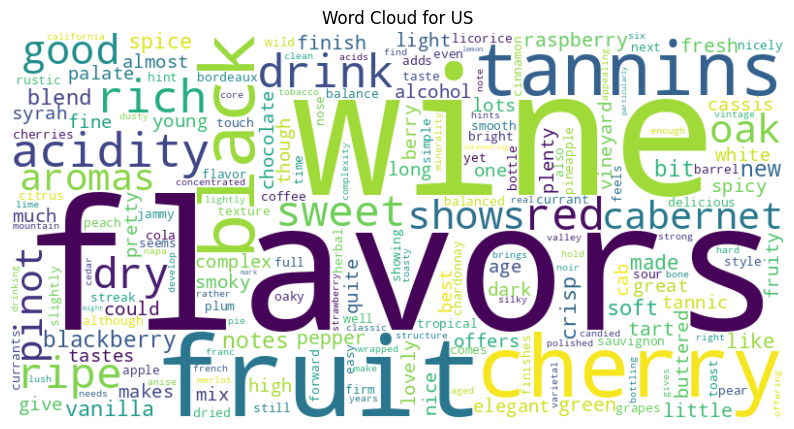

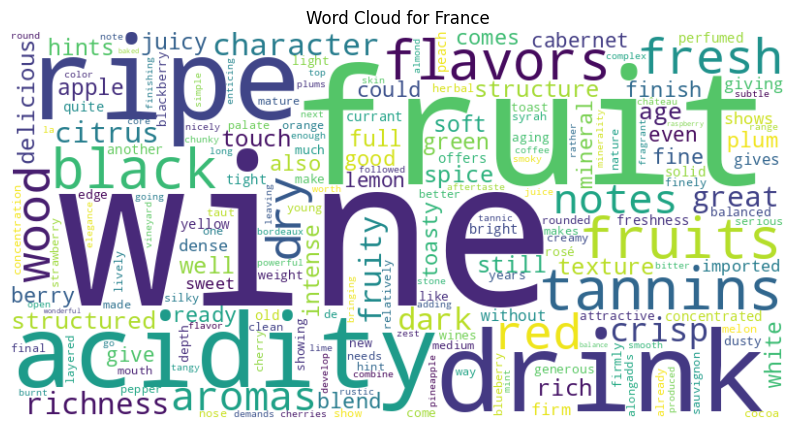

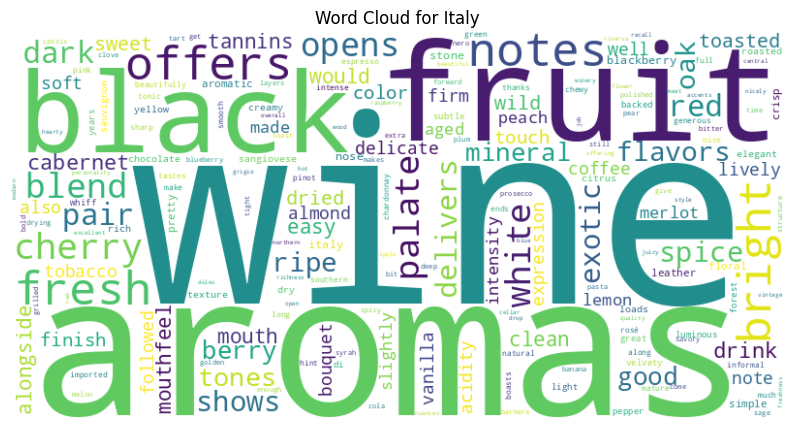

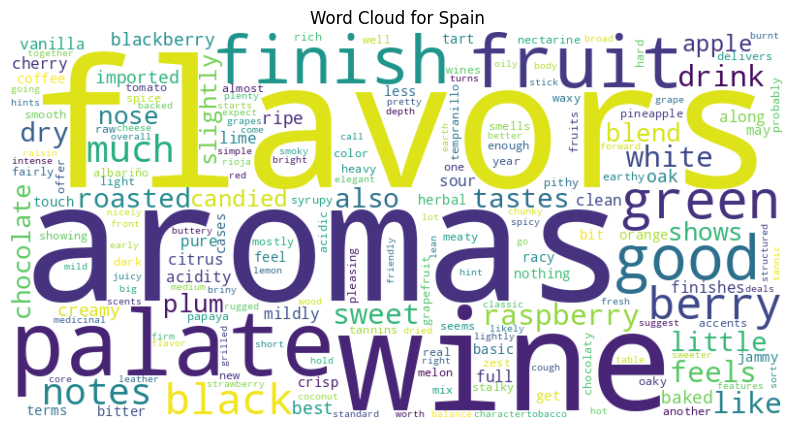

In [31]:
# Visualize the most frequent words for each country

for country, word_count in country_word_counts.items():
    top_words = word_count.most_common(top_n)
    words, counts = zip(*top_words)

    # Word cloud for each country
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {country}')
    plt.show()

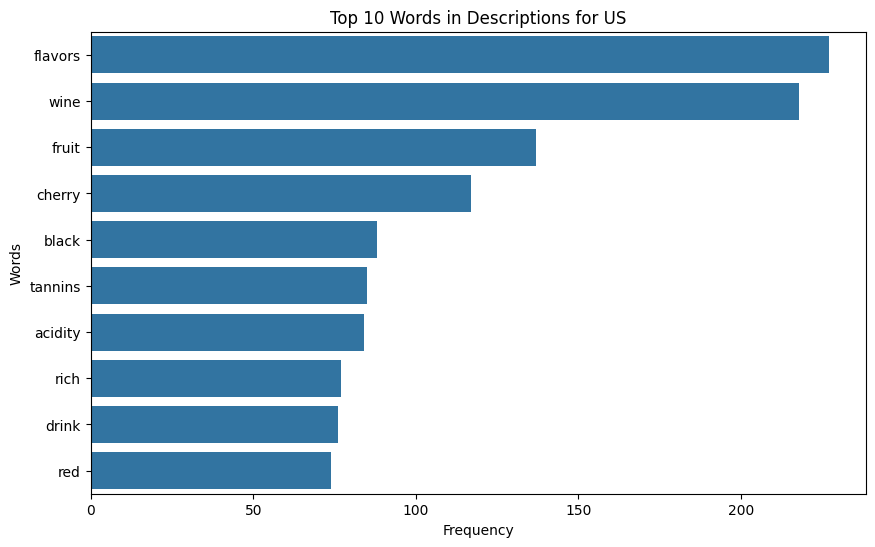

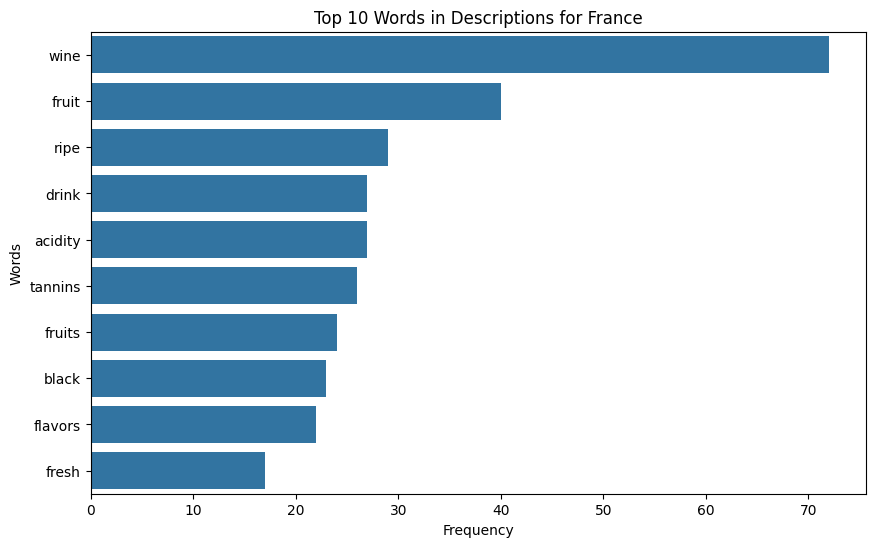

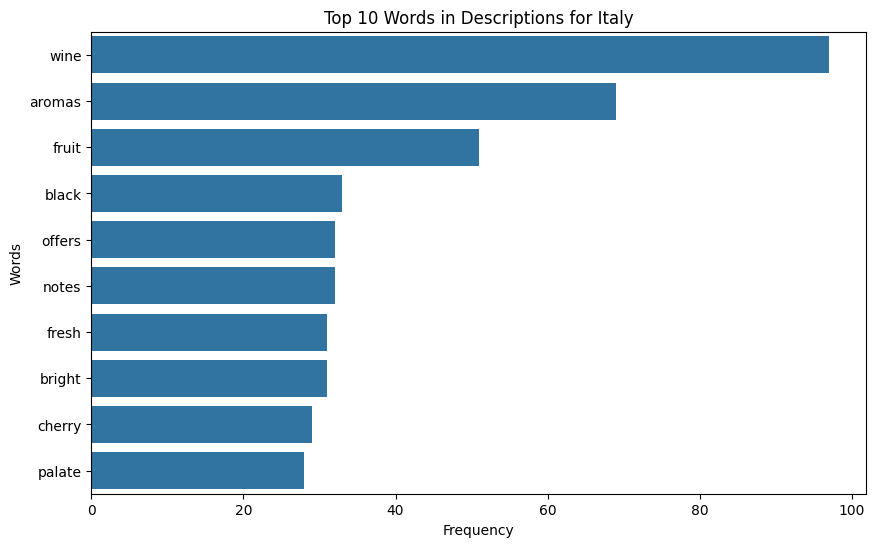

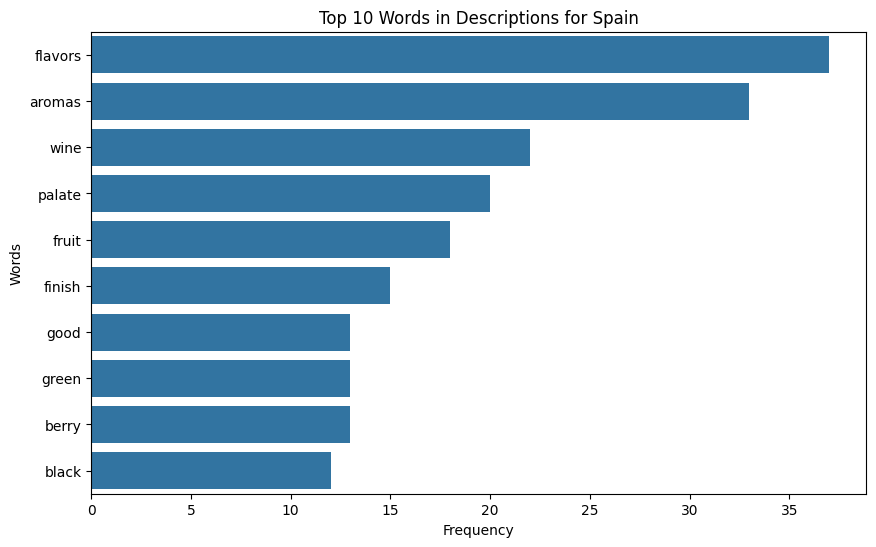

In [32]:
top_n = 10  # Number of top words to display
for country, word_count in country_word_counts.items():
    top_words = word_count.most_common(top_n)
    words, counts = zip(*top_words)

    # Bar plot for each country
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {top_n} Words in Descriptions for {country}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()